$$\huge{\text{Module 5-Neural Nets}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt



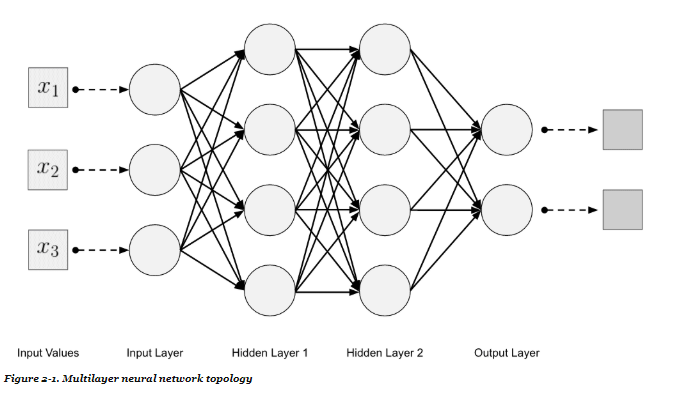

<font size=4>
To move from one layer to the next we use Matrices for example to get from the input layer to the first hidden layer we would multiply the ($1\times 3$) vector in the input layer by a matrix $W^1_{3\times 4}$ (Note in math we normally multiply matrices on the left so all the dimensions are reversed from many of the applications we have seen before.)  What would be the dimensions of the matrix $W^3$ that would go from hidden layer 2 to the output layer?

What is not illustrated here is a non linear step between matrix multiplications.  Usually referred to as activation.  See next schematic below.

In Classification OUR GOAL is to find values for $W^k$  that minimize the Error between our output values and our targets.  The way we have been doing this so far is to have a cost function dependent on the weights $W^k_{i,j}$ and use Gradient Descent. 



<font size=4>
We are going to use the $\log$ of the sigmoid(logistic function) $\sigma(x)=\frac{1}{1+e^{-x}}$to compute our gradients and update our W.  Look back at Logistic regression to see properties of the derivative of $\log(\sigma(X))$.
$$\text{Derivative }\frac{d}{dt}(\sigma(t)) =\sigma(t)(1-\sigma(t))$$

$$W_{new}=W_{old}+(X.T)\nabla out \text{ with } \nabla out=(error)\frac{d(\sigma(out))}{dx}$$

MORE LATER!!!!
    
 Toy Example from [Iamtrask](https://iamtrask.github.io/2015/07/12/basic-python-network/) 

<font size=4>Let's try a  hidden layer network. Here is a diagram for a 3 hidden  layer network but we will start with a two layer network.
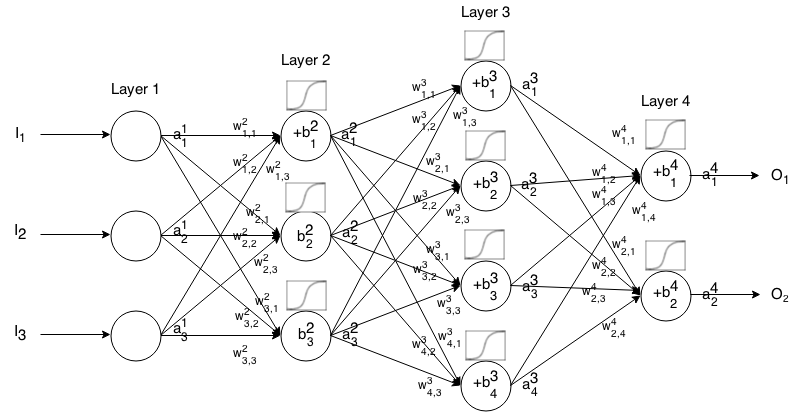

# Iris data by hand.  Binary target

<font size=4>   First let's get the iris data.

In [2]:
#Import Data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

<font size=4>First prepare the data. I had to reshape y to get it to work.  __Use all four predictors__

In [3]:
#One input Binary Class
X = iris["data"]
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
y=y.reshape((150,1))
X.shape

(150, 4)

## Changes from above.

<font size=4>1) Check dimensions in 11 and or 12 just to get it to run.

Lets make the first layer of the network have 11 nodes.
   
    
    


Error:0.4298139181198833
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084
Error:0.3333333333337084


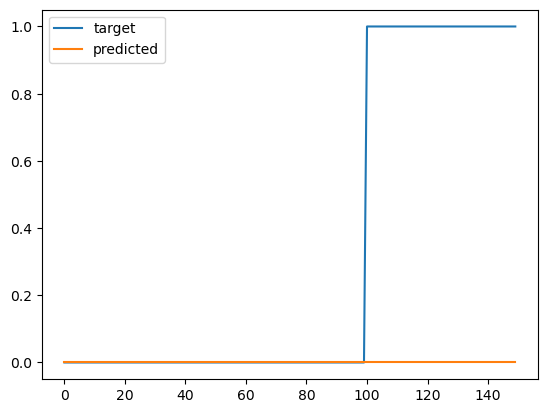

In [4]:
#student
#Multi hidden layer network for iris

def sigm(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
np.random.seed(1)
# randomly initialize our weights with mean 0
W1 = 2*np.random.random((4,11)) - 1
W2 = 2*np.random.random((11,1)) - 1

for j in range(100000):

	# Feed forward through layers 0, 1, and 2
    X
    X1 = sigm(np.dot(X,W1))
    out = sigm(np.dot(X1,W2))

    # how much did we miss the target value?
    out_error = y - out
    
    if (j% 10000) == 0: #print error every 1000 runs through
        print("Error:" + str(np.mean(np.abs(out_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    out_delta = out_error*sigm(out,deriv=True)

    # how much did each X1 value contribute to the out_error (according to the weights)?
    X1_error = out_delta.dot(W2.T)
    
    # in what direction is the target X1?
    # were we really sure? if so, don't change too much.
    X1_delta = X1_error * sigm(X1,deriv=True)

    W2 += X1.T.dot(out_delta)
    W1 += X.T.dot(X1_delta)
plt.plot(y)
plt.plot(np.around(out))
plt.legend(["target", "predicted"])

<font size=4>__Results__

My first results were pretty terrible everything is predicted as non Virginica!! Our error stays at 1/3.

In the initial toy problems the gamma in the back propagation is always 1.  

1) Let's add a step size to the gradient in  the back propagation.  Try $\gamma=.1$ <font color=blue> __Where would that go?__

 

Error:0.4298139181198833
Error:0.017970984088917365
Error:0.010469342903952744
Error:0.009238478318665377
Error:0.00869569023604103
Error:0.008379799086829471
Error:0.008168983124818695
Error:0.008016243332259
Error:0.007899359628494319
Error:0.007806365900708043


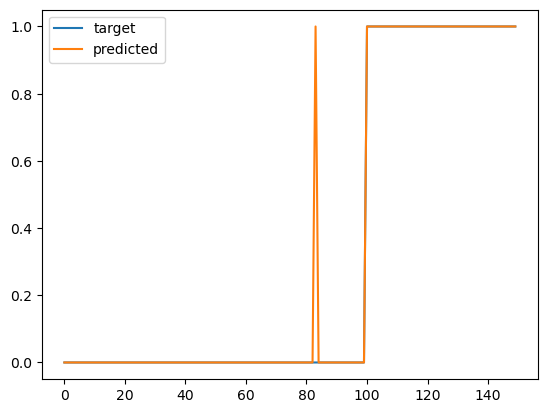

In [5]:

#Multi hidden layer network for iris

def sigm(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
np.random.seed(1)


# randomly initialize our weights with mean 0
W1 = 2*np.random.random((4,11)) - 1
W2 = 2*np.random.random((11,1)) - 1

gam=.1# adding stepsize for Back propigation

for j in range(100000):

	# Feed forward through layers 0, 1, and 2
    X
    X1 = sigm(np.dot(X,W1))
    out = sigm(np.dot(X1,W2))

    # how much did we miss the target value?
    out_error = y - out
    
    if (j% 10000) == 0: #print error every 1000 runs through
        print("Error:" + str(np.mean(np.abs(out_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    out_delta = out_error*sigm(out,deriv=True)*gam

    # how much did each X1 value contribute to the out_error (according to the weights)?
    X1_error = out_delta.dot(W2.T)
    
    # in what direction is the target X1?
    # were we really sure? if so, don't change too much.
    X1_delta = X1_error * sigm(X1,deriv=True)*gam

    W2 += X1.T.dot(out_delta)
    W1 += X.T.dot(X1_delta)
    
plt.plot(y)
plt.plot(np.around(out))
plt.legend(["target", "predicted"])

<font size=4> __Results__

More like it.  Looks like we missed one.  Can we verify that? 

In [6]:
np.around(out[80:90]).T

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

<font size=4> __Predict__

Lets recall what the variables are. Take away # and run to see description. 

In [12]:
#print(iris.DESCR)

<font size=4> Predict if a flower with measurements

- sepal length in 1.2 cm
- sepal width in 1 cm
- petal length in 2.2 cm
- petal width in 3 cm

is Virginica or not.


In [7]:
W1,W2

(array([[-0.3176022 ,  1.66303868, -4.15288056, -1.30831778, -0.47064433,
         -0.81126637, -0.73398887, -4.31758608,  1.15585169, -0.26646441,
          0.04477676],
        [ 4.35395599, -2.92789919,  4.29907741, -2.83645905,  1.34629012,
         -0.16314181,  2.10892457,  0.53550904, -1.4003137 ,  5.430687  ,
          1.02331304],
        [-1.92533685, -0.54477578,  2.68515716,  2.6455143 , -0.5524709 ,
         -0.91965869, -0.54282845,  4.1119046 , -0.8414678 , -2.46333514,
          1.06487013],
        [-1.42029045, -0.43865653,  1.24053403,  2.0982003 ,  0.6001023 ,
         -0.96281611,  0.07993244,  3.6528798 , -0.11786092, -1.9969863 ,
          0.62205   ]]),
 array([[-13.38649454],
        [ -9.74925409],
        [ 16.28314143],
        [  7.08695612],
        [ -5.15983692],
        [ -0.75035261],
        [ -7.79306889],
        [ 12.86899084],
        [ -6.88718117],
        [-15.86171702],
        [ -9.99832413]]))

In [8]:
## student
xx=np.array([3.2,.1,2.2,.3])  
X1 = sigm(np.dot(xx,W1))
(sigm(np.dot(X1,W2)))

array([5.9245053e-09])

<font size=4> Compare with the logistic regression results  from previous module use two predictors.. 

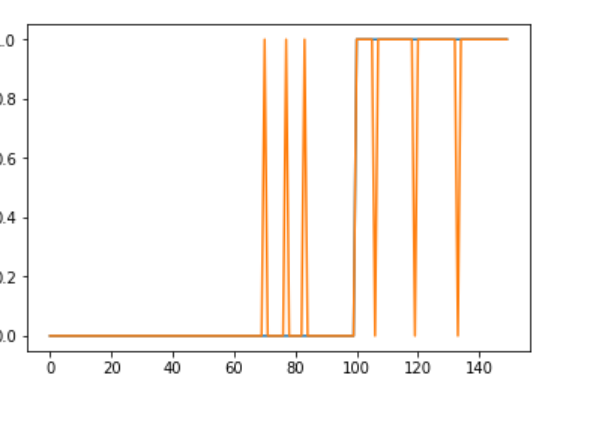

Pretty good for around 30 lines of actual code(i.e. taking out comments and spaces).  

Does a 3 hidden layer get the one you we missed? I haven't tried it yet. 

## Part 3 Multi Layer-Multiclass

http://briandolhansky.com/blog/2013/9/23/artificial-neural-nets-linear-multiclass-part-3 


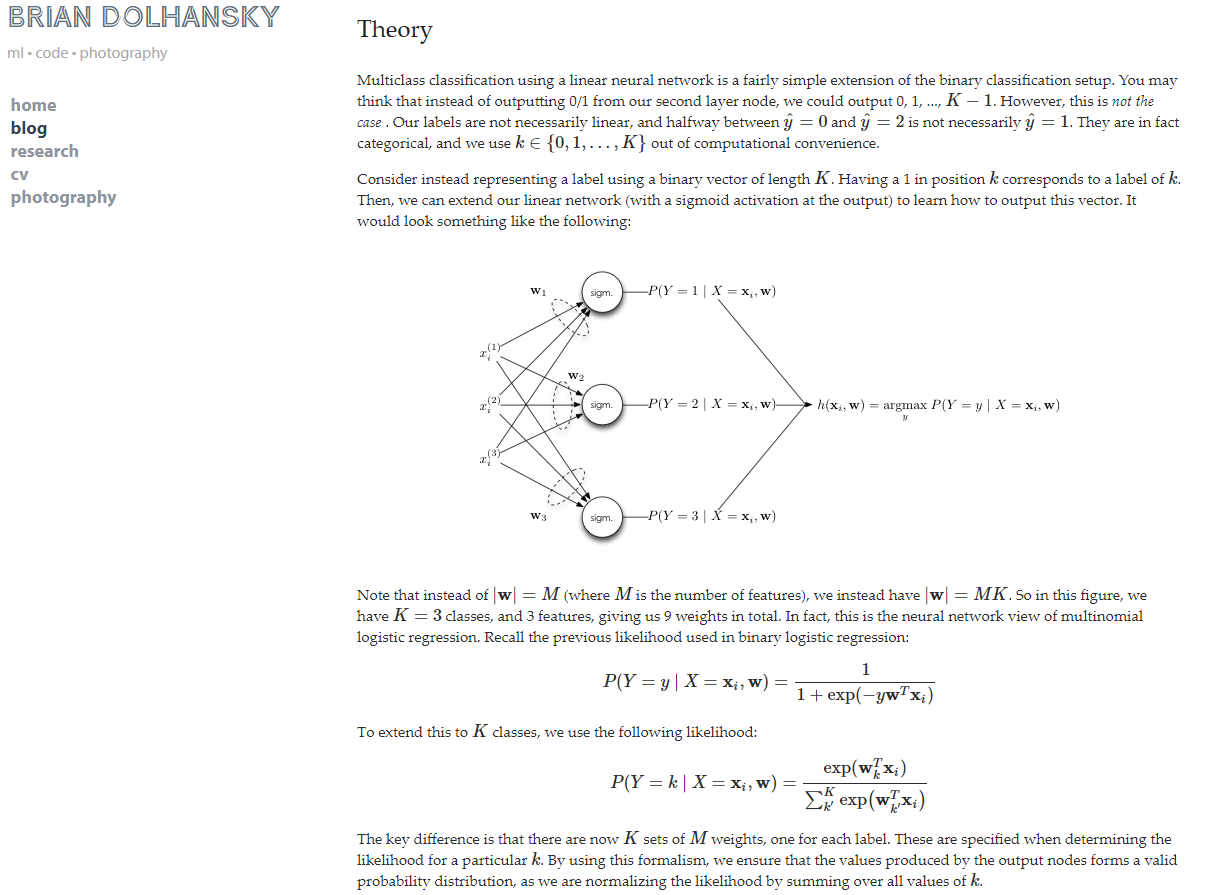




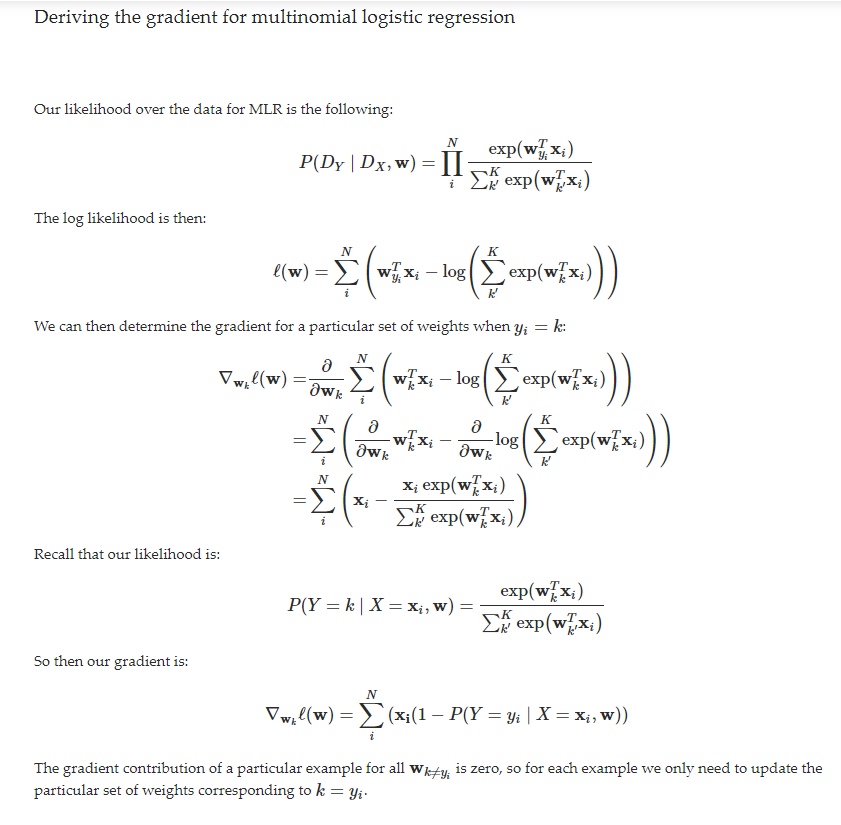

<font size=4> For a Model using this Gradient for back propagation see https://cs231n.github.io/neural-networks-case-study/ .  I'm going to do a variant of what we have above.   

# Simple Multilayer NN

<font size=4><font size=4> Let's use the Iris data  set again.  All features. Let's start with a model without a bias termo out input should just be $150 \times4$ I'm going to shuffle up the data so the types of flowers aren't grouped 50-50-50.

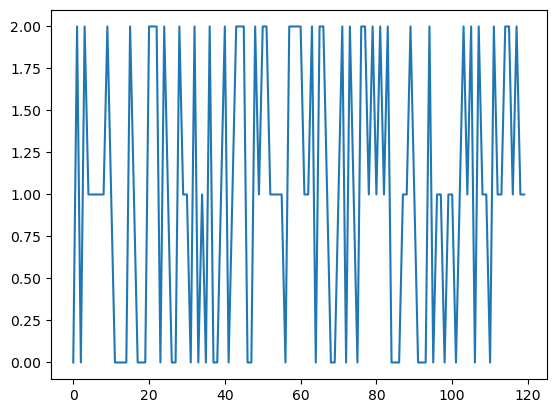

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
Xo = iris["data"]
yo = (iris["target"]).astype(int)
from sklearn.utils import shuffle
Xs,ys=shuffle(Xo,yo)
from sklearn.model_selection import train_test_split
X, X_test, yts, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)
yt=yts.reshape((120,1))
plt.plot(yt)


In [10]:
yo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<font size=4> To make it easier to code I am going to one_not_encode the target.  

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
y = encoder.fit_transform(yt)
y=y.toarray()
y.shape
#y

(120, 3)

<font size=4> I am going to add a column of ones to the features.  __WHY?__

In [12]:
b=np.ones(120).reshape(120,1)
Xb=np.concatenate((b,X),axis=1)
X.shape, Xb.shape

((120, 4), (120, 5))

In [13]:
Xb

array([[1. , 5. , 3.4, 1.6, 0.4],
       [1. , 7.2, 3.6, 6.1, 2.5],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 4.9, 2.5, 4.5, 1.7],
       [1. , 7. , 3.2, 4.7, 1.4],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 6.6, 2.9, 4.6, 1.3],
       [1. , 5.7, 2.6, 3.5, 1. ],
       [1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 6.5, 3.2, 5.1, 2. ],
       [1. , 6.7, 3. , 5. , 1.7],
       [1. , 4.4, 3.2, 1.3, 0.2],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.4, 3.4, 1.5, 0.4],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 6. , 2.2, 5. , 1.5],
       [1. , 6.6, 3. , 4.4, 1.4],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 6.9, 3.2, 5.7, 2.3],
       [1. , 7.6, 3. , 6.6, 2.1],
       [1. , 6.5, 3. , 5.8, 2.2],
       [1. , 5.1, 3.4, 1.5, 0.2],
       [1. , 6.8, 3. , 5.5, 2.1],
       [1. , 5.6, 3. , 4.1, 1.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 4.7, 3.2, 1.6, 0.2],
       [1. , 6.9, 3.1, 5.1, 2.3],
       [1. , 5

<font size =4 >  Now let's make some minor changes to the code above. namely we are going to add some layers. 

In [14]:
def sigm(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
np.random.seed(1)

#Hidden Layers
W1 = 2*np.random.random((4,16)) - 1 #(5,16) bias term (4,16) no bias term
W2 = 2*np.random.random((16,32)) - 1
W3 = 2*np.random.random((32,3)) - 1

# adding stepsize for Back propigation
gam=.1

for j in range(100000):

	# Feed forward through layers 0, 1, and 2
    X0=X # Use Xb for a bias term X for no bias term
    X1 = sigm(np.dot(X0,W1))
    X2 = sigm(np.dot(X1,W2))
    out = sigm(np.dot(X2,W3))

    # how much did we miss the target value?
    out_error = y - out
    
    if (j% 10000) == 0: #print error every 1000 runs through
        print("Error:" + str(np.mean(np.abs(out_error))))
        
    # in what direction is the target value?
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in out
    out_delta = out_error*sigm(out,deriv=True)*gam  

    # how much did each X1 value contribute to the out_error (according to the weights)?
    X2_error = out_delta.dot(W3.T)
    X2_delta = X2_error * sigm(X2,deriv=True)*gam
   
    # in what direction is the target X1?
    X1_error = X2_delta.dot(W2.T)
    X1_delta = X1_error * sigm(X1,deriv=True)*gam
    
    # update weights
    W3 += X2.T.dot(out_delta)
    W2 += X1.T.dot(X2_delta)
    W1 += X0.T.dot(X1_delta)

Error:0.47259880707156854
Error:0.014421718683155015
Error:0.003729390527761113
Error:0.0020739553407158446
Error:0.0015115922790726378
Error:0.0012218901861843173
Error:0.0010419220567740616
Error:0.0009176863553897378
Error:0.0008259314918635361
Error:0.0007549116664013241


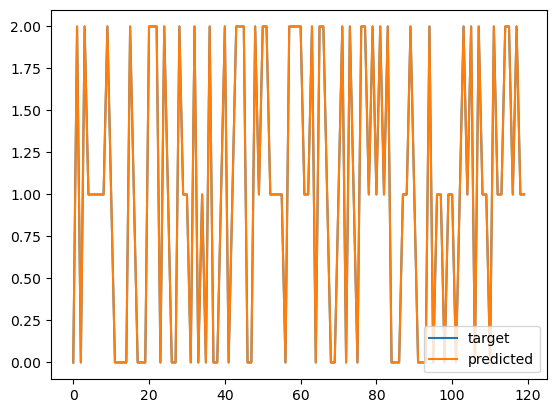

In [15]:
yy=np.argmax(out,axis=1)    
yy=yy.reshape(120,1)
plt.plot(yy, label='predicted')
plt.plot(yt, label='target')
plt.legend(["target", "predicted"])

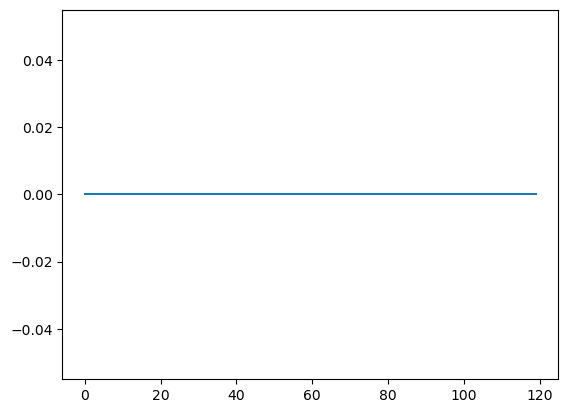

In [16]:
plt.plot(yy-yt)


## Let's try it on our test set.

In [17]:
X1 = sigm(np.dot(X_test,W1))
X2 = sigm(np.dot(X1,W2))
out2 = sigm(np.dot(X2,W3))

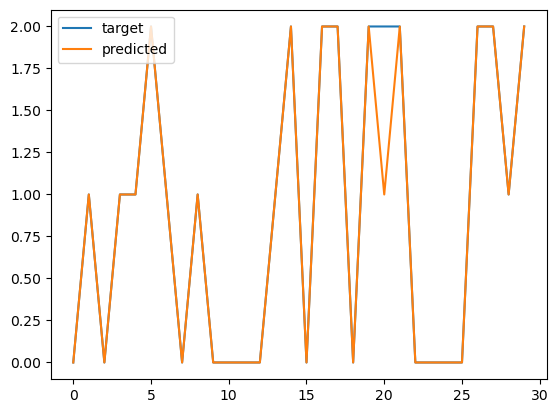

In [18]:
yy=np.argmax(out2,axis=1)    
yy=yy.reshape(30,1)
plt.plot(yy, label='predicted')
plt.plot(y_test, label='target')
plt.legend(["target", "predicted"])



## <font color=blue> Out of class exercise:  Rerun the hand written model but scale first.
    

In [25]:
X.shape,yts.shape



((120, 4), (120,))

## Let's compare with SKlearn.  First we will try just two hidden layers 

    hidden_layer_sizes=(16,32)

How many did it miss 3.0


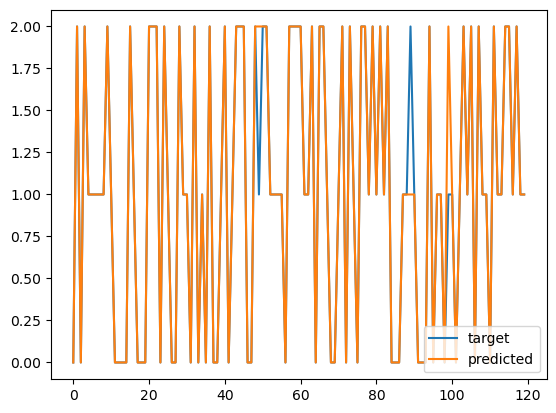

In [26]:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000
                    ,alpha=.1,random_state=42,hidden_layer_sizes=(16,32))
mlp.fit(X, yts)
out=mlp.predict(X)
plt.plot(yt, label='target')
plt.plot(mlp.predict(X), label='predicted')
plt.legend()
print('How many did it miss',np.round(2*np.abs(out-yts)/3).sum())

In [27]:
mlp.score(X,yts)

0.975

<font size=4 color=blue> __Try 3 hidden layers.__  

How many did it miss 2.0


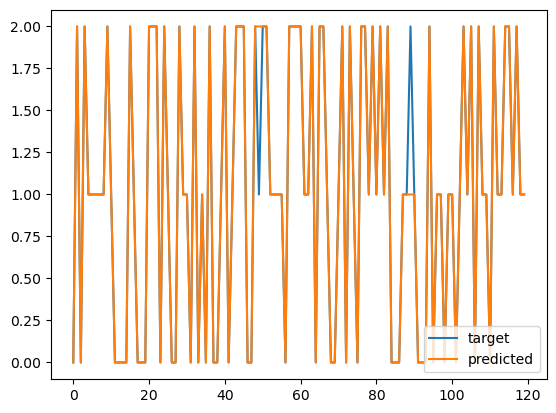

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=10000,alpha=.1,random_state=42,hidden_layer_sizes=(16,32,32))
mlp.fit(X, yts)
out=mlp.predict(X)
plt.plot(yt, label='target')
plt.plot(mlp.predict(X), label='predicted')
plt.legend()
print('How many did it miss',np.round(2*np.abs(out-yts)/3).sum())

<font size=4 color =blue>   __I still got 3 errors. We didn't scale first try that with StandardScaler.  Make sure you use  .fit_transform so we can transform the test set later.__

How many did it miss 1.0


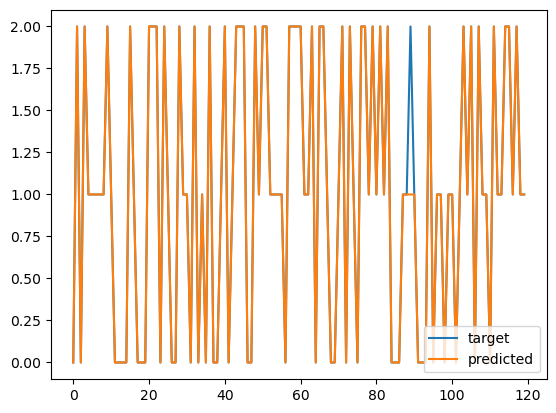

In [29]:
from sklearn.preprocessing import StandardScaler
STSC=StandardScaler()
XSS=STSC.fit_transform(X)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=10000,alpha=.1,random_state=42,hidden_layer_sizes=(16,32))
mlp.fit(XSS, yts)
out=mlp.predict(XSS)
plt.plot(yt, label='target')
plt.plot(mlp.predict(XSS), label='predicted')
plt.legend()
print('How many did it miss',np.round(2*np.abs(out-yts)/3).sum())


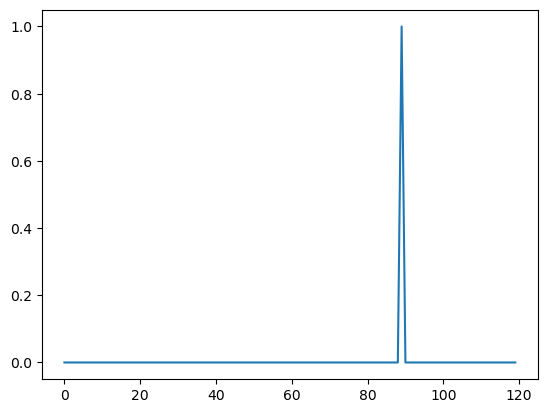

In [30]:
plt.plot(np.abs(out-yts))

<font size=4 color =blue>__Now let's see how we do on the test set.  Don't forget to scale it__ 

In [31]:
X_test_S=STSC.transform(X_test)
mlp.score(X_test_S,y_test)

0.9666666666666667

In [32]:
print(mlp.coefs_[0].shape, mlp.intercepts_[0].shape, 
mlp.coefs_[1].shape, mlp.intercepts_[1].shape,
mlp.coefs_[2].shape, mlp.intercepts_[2].shape)

(4, 16) (16,) (16, 32) (32,) (32, 3) (3,)
